In [1]:
file=open('equinix-chicago.dirA.20140320-130000.UTC.anon.pcap.flow.txt','r')
Data=file.readlines()
K=0 #总通信次数
MIN_num=2**31 #最小主机编号
MAX_num=0 #最大主机编号
MAX_times=0 #最多通信次数
MAX_a=0 #最多通信对a
MAX_b=0 #最多通信对b
for i in Data:
    j=i.split()
    MIN_num=min(int(j[0]),int(j[1]),MIN_num)
    MAX_num=max(int(j[0]),int(j[1]),MAX_num)
    K=K+1
print('总通信次数:',K)
print('最小主机编号:',MIN_num)
print('最大主机编号:',MAX_num)

总通信次数: 18866027
最小主机编号: 0
最大主机编号: 4294955937


In [2]:
#参数计算
import math
D=0
W=0
def get_para(a,b):    
    d=math.log((1/b),math.e)
    w=(K/a)*math.e
    print("宽度:",w)
    print("深度:",d)
    return (int(w),int(d))

In [3]:
#构造五种哈希函数
def hash0(a,b,c):
    z=(a*b)%c
    return z
def hash1(a,b,c):
    z=(a+b)%c
    return z
def hash2(a,b,c):
    z=int(a&b)%c
    return z
def hash3(a,b,c):
    z=int(a|b)%c
    return z
def hash4(a,b,c):
    z=int(a^b)%c
    return z
def hash5(a,b,c):
    z=((a+b)**2)%c
    return int(z)
def hash6(a,b,c):
    z=((a*b)**3)%c
    return int(z)
#统一调度接口
def Hash(a,b,c,k):
    if(k==0):
        z=hash0(a,b,c)
    if(k==1):
        z=hash1(a,b,c)
    if(k==2):
        z=hash2(a,b,c)
    if(k==3):
        z=hash3(a,b,c)
    if(k==4):
        z=hash4(a,b,c)
    if(k==5):
        z=hash5(a,b,c)
    if(k==6):
        z=int(hash6(a,b,c))
    return z

In [21]:
#哈希表初始化
def precreate(w,d):
    a=[]
    for j in range(0,d):
        temp=[]
        for i in range(0,w):
            temp.append(0)
        a.append(temp)
    return a

#计数队列初始化
def precreate_q(n):
    que=[]
    for i in range(0,n):
        que.append([0,0,0])
    return que

def take(elem):
    return elem[0]

#哈希表RealTime级构建
def creat(w,d,n,a,que):
    maxh=0
    maxa=0
    maxb=0
    for i in range(0,len(Data)):
        j=Data[i].split()
        for k in range(0,d):
            t=Hash(int(j[0]),int(j[1]),w,k)
            a[k][t]=a[k][t]+1
        temp=2**31-1
        for k in range(0,d):
            t=Hash(int(j[0]),int(j[1]),w,k)
            temp=min(temp,a[k][t])
        if(temp>que[0][0]):
            In=False
            for z in range(0,n):
                if (((int(j[0])==que[z][1]) and (int(j[1])==que[z][2])) or ((int(j[1])==que[z][1]) and (int(j[0])==que[z][2]))):
                    que[z][0]=temp
                    In=True
                    que.sort(key=take)
            if (In==False):
                que[0][0]=temp
                que[0][1]=int(j[0])
                que[0][2]=int(j[1])
                que.sort(key=take)
    print('creat_done')
    for i in range(0,n):
        print(que[i])
    return a

In [28]:
def test_one(a,b,times):
    count=0
    for i in Data:
        j=i.split()
        if((int(j[0])==a)and(int(j[1])==b)):
            count=count+1
        if((int(j[0])==b)and(int(j[1])==a)):
            count=count+1
    return times-count

def test_que(que):
    mean_err=0.0
    max_err=0
    for i in que:
        err=test_one(i[1],i[2],i[0])
        mean_err=mean_err+err
        max_err=max(max_err,err)
    mean_err=mean_err/len(que)
    print(mean_err,max_err)
    return (mean_err,max_err)

In [31]:
#最终结果
import time
start=time.time()
A=[]
Que=[]
(W,D)=get_para(5,0.001)
N=10
A=precreate(W,D)
Que=precreate_q(N)
A=creat(W,D,N,A,Que)
print('cheking')
print('误差：',test_que(Que))
end=time.time()
print('耗时：',end-start,'s')

宽度: 10256635.673863543
深度: 6.907755278982137
creat_done
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
cheking
0.0 0
误差： (0.0, 0)
耗时： 543.0398414134979 s


In [37]:
#哈希测试
Error=[]
Error_m=[]
Para=[]
N=20
for i in range(5,20,1):
    Err=[]
    Err_m=[]
    Par=[]
    for j in range(3,0,-1):
        A=[]
        Que=[]
        k=1/float(10**j)
        print('理论最大误差：',i)
        print('置信度：',1-k)
        (W,D)=get_para(i,k)
        A=precreate(W,D)
        Que=precreate_q(N)
        A=creat(W,D,N,A,Que)
        temp=test_que(Que)
        print('平均误差：',temp[0])
        print('最大误差：',temp[1])
        Err.append(temp[1])
        Err_m.append(temp[0])
        Par.append((i,j))
        print()
    Error.append(Err)
    Error_m.append(Err_m)
    Para.append(Par)
        
for i in range(20,50,2):
    Err=[]
    Err_m=[]
    Par=[]
    for j in range(3,0,-1):
        A=[]
        Que=[]
        k=1/float(10**j)
        print('理论最大误差：',i)
        print('置信度：',1-k)
        (W,D)=get_para(i,k)
        A=precreate(W,D)
        Que=precreate_q(N)
        A=creat(W,D,N,A,Que)
        temp=test_que(Que)
        print('平均误差：',temp[0])
        print('最大误差：',temp[1])
        Err.append(temp[1])
        Err_m.append(temp[0])
        Par.append((i,j))
        print()
    Error.append(Err)
    Error_m.append(Err_m)
    Para.append(Par)
        


理论最大误差： 5
置信度： 0.999
宽度: 10256635.673863543
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.0 0
平均误差： 0.0
最大误差： 0

理论最大误差： 5
置信度： 0.99
宽度: 10256635.673863543
深度: 4.605170185988092
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 152366647

[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89003, 647067801, 1281048150]
0.05 1
平均误差： 0.05
最大误差： 1

理论最大误差： 9
置信度： 0.999
宽度: 5698130.92992419
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 419

理论最大误差： 12
置信度： 0.9
宽度: 4273598.1974431425
深度: 2.302585092994046
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45731, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.05 1
平均误差： 0.05
最大误差： 1

理论最大误差： 13
置信度： 0.999
宽度: 3944859.8745629014
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 152366

[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.0 0
平均误差： 0.0
最大误差： 0

理论最大误差： 16
置信度： 0.9
宽度: 3205198.648082357
深度: 2.302585092994046
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 41964

理论最大误差： 20
置信度： 0.99
宽度: 2564158.918465886
深度: 4.605170185988092
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.0 0
平均误差： 0.0
最大误差： 0

理论最大误差： 20
置信度： 0.9
宽度: 2564158.918465886
深度: 2.302585092994046
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]

[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.0 0
平均误差： 0.0
最大误差： 0

理论最大误差： 28
置信度： 0.99
宽度: 1831542.0846184897
深度: 4.605170185988092
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 419

理论最大误差： 36
置信度： 0.999
宽度: 1424532.7324810475
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.0 0
平均误差： 0.0
最大误差： 0

理论最大误差： 36
置信度： 0.99
宽度: 1424532.7324810475
深度: 4.605170185988092
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666

[45731, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52892, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57051, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60688, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83315, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.8 7
平均误差： 0.8
最大误差： 7

理论最大误差： 44
置信度： 0.999
宽度: 1165526.781120857
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 398

理论最大误差： 50
置信度： 0.9
宽度: 1025663.5673863542
深度: 2.302585092994046
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83320, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.3 6
平均误差： 0.3
最大误差： 6



AttributeError: 'list' object has no attribute 'apend'

In [43]:
for i in range(55,100,5):
    Err=[]
    Err_m=[]
    Par=[]
    for j in range(3,0,-1):
        A=[]
        Que=[]
        k=1/float(10**j)
        print('理论最大误差：',i)
        print('置信度：',1-k)
        (W,D)=get_para(i,k)
        A=precreate(W,D)
        Que=precreate_q(N)
        A=creat(W,D,N,A,Que)
        temp=test_que(Que)
        print('平均误差：',temp[0])
        print('最大误差：',temp[1])
        Err.append(temp[1])
        Err_m.append(temp[0])
        Par.append((i,j))
        print()
    Error.append(Err)
    Error_m.append(Err_m)
    Para.append(Par)
        
for i in range(100,1000,50):
    Err=[]
    Err_m=[]
    Par=[]
    for j in range(3,0,-1):
        A=[]
        Que=[]
        k=1/float(10**j)
        print('理论最大误差：',i)
        print('置信度：',1-k)
        (W,D)=get_para(i,k)
        A=precreate(W,D)
        Que=precreate_q(N)
        A=creat(W,D,N,A,Que)
        temp=test_que(Que)
        print('平均误差：',temp[0])
        print('最大误差：',temp[1])
        Err.append(temp[1])
        Err_m.append(temp[0])
        Par.append((i,j))
        print()
    Error.append(Err)
    Error_m.append(Err_m)
    Para.append(Par)

理论最大误差： 55
置信度： 0.999
宽度: 932421.4248966858
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.0 0
平均误差： 0.0
最大误差： 0

理论最大误差： 55
置信度： 0.99
宽度: 932421.4248966858
深度: 4.605170185988092
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 152366647

[45095, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57054, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60682, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83316, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
0.55 4
平均误差： 0.55
最大误差： 4

理论最大误差： 75
置信度： 0.999
宽度: 683775.7115909029
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56172, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4

理论最大误差： 90
置信度： 0.9
宽度: 569813.092992419
深度: 2.302585092994046
creat_done
[39467, 1492121909, 1540443694]
[39799, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45730, 1645503930, 3918827076]
[47019, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52889, 23675731, 1281048150]
[56173, 1381261349, 1654615343]
[56651, 1191936803, 1714489407]
[57050, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79547, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89004, 647067801, 1281048150]
0.55 5
平均误差： 0.55
最大误差： 5

理论最大误差： 95
置信度： 0.999
宽度: 539822.9302033443
深度: 6.907755278982137
creat_done
[39467, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41424, 1492121909, 1506889262]
[41759, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44488, 1492121909, 152366647

[45094, 1492121909, 1456557614]
[45732, 1645503930, 3918827076]
[47021, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56178, 1381261349, 1654615343]
[56651, 1191936803, 1714489407]
[57052, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[61993, 352061493, 1281048150]
[79543, 3309037651, 2254759]
[83314, 1148279497, 1767542340]
[89002, 647067801, 1281048150]
1.15 6
平均误差： 1.15
最大误差： 6

理论最大误差： 200
置信度： 0.9
宽度: 256415.89184658855
深度: 2.302585092994046
creat_done
[39469, 1492121909, 1540443694]
[39798, 3864845461, 1544910013]
[41427, 1492121909, 1506889262]
[41760, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44493, 1492121909, 1523666478]
[45094, 1492121909, 1456557614]
[45742, 1645503930, 3918827076]
[47021, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56178, 1381261349, 1654615343]
[56652, 1191936803, 1714489407]
[57052, 4033332886, 1281048150]
[58834, 4

理论最大误差： 400
置信度： 0.99
宽度: 128207.94592329428
深度: 4.605170185988092
creat_done
[39468, 1492121909, 1540443694]
[39799, 3864845461, 1544910013]
[41428, 1492121909, 1506889262]
[41770, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44492, 1492121909, 1523666478]
[45098, 1492121909, 1456557614]
[45769, 1645503930, 3918827076]
[47043, 2606730531, 1281048150]
[49553, 3848258193, 1511355581]
[52888, 23675731, 1281048150]
[56184, 1381261349, 1654615343]
[56650, 1191936803, 1714489407]
[57052, 4033332886, 1281048150]
[58825, 4196430673, 1281048150]
[60681, 3986324625, 1281048150]
[62012, 352061493, 1281048150]
[79543, 3309037651, 2254759]
[83319, 1148279497, 1767542340]
[89007, 647067801, 1281048150]
6.65 39
平均误差： 6.65
最大误差： 39

理论最大误差： 400
置信度： 0.9
宽度: 128207.94592329428
深度: 2.302585092994046
creat_done
[39468, 1492121909, 1540443694]
[39800, 3864845461, 1544910013]
[41428, 1492121909, 1506889262]
[41770, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44492, 1492121909, 152

[45110, 1492121909, 1456557614]
[45741, 1645503930, 3918827076]
[47023, 2606730531, 1281048150]
[49561, 3848258193, 1511355581]
[52889, 23675731, 1281048150]
[56175, 1381261349, 1654615343]
[56653, 1191936803, 1714489407]
[57061, 4033332886, 1281048150]
[58824, 4196430673, 1281048150]
[60685, 3986324625, 1281048150]
[61999, 352061493, 1281048150]
[79562, 3309037651, 2254759]
[83320, 1148279497, 1767542340]
[89006, 647067801, 1281048150]
8.2 22
平均误差： 8.2
最大误差： 22

理论最大误差： 600
置信度： 0.99
宽度: 85471.96394886286
深度: 4.605170185988092
creat_done
[39480, 1492121909, 1540443694]
[39813, 3864845461, 1544910013]
[41446, 1492121909, 1506889262]
[41768, 1492121909, 1557220910]
[44138, 1157894612, 1281048150]
[44496, 1492121909, 1523666478]
[45110, 1492121909, 1456557614]
[45741, 1645503930, 3918827076]
[47023, 2606730531, 1281048150]
[49561, 3848258193, 1511355581]
[52889, 23675731, 1281048150]
[56178, 1381261349, 1654615343]
[56653, 1191936803, 1714489407]
[57061, 4033332886, 1281048150]
[58824, 4

理论最大误差： 800
置信度： 0.999
宽度: 64103.97296164714
深度: 6.907755278982137
creat_done
[39468, 1492121909, 1540443694]
[39800, 3864845461, 1544910013]
[41433, 1492121909, 1506889262]
[41768, 1492121909, 1557220910]
[44140, 1157894612, 1281048150]
[44493, 1492121909, 1523666478]
[45095, 1492121909, 1456557614]
[45735, 1645503930, 3918827076]
[47022, 2606730531, 1281048150]
[49561, 3848258193, 1511355581]
[52893, 23675731, 1281048150]
[56191, 1381261349, 1654615343]
[56667, 1191936803, 1714489407]
[57064, 4033332886, 1281048150]
[58831, 4196430673, 1281048150]
[60687, 3986324625, 1281048150]
[61999, 352061493, 1281048150]
[79542, 3309037651, 2254759]
[83317, 1148279497, 1767542340]
[89011, 647067801, 1281048150]
6.55 19
平均误差： 6.55
最大误差： 19

理论最大误差： 800
置信度： 0.99
宽度: 64103.97296164714
深度: 4.605170185988092
creat_done
[39468, 1492121909, 1540443694]
[39800, 3864845461, 1544910013]
[41631, 1492121909, 1506889262]
[41768, 1492121909, 1557220910]
[44140, 1157894612, 1281048150]
[44503, 1492121909, 152

理论最大误差： 950
置信度： 0.9
宽度: 53982.29302033443
深度: 2.302585092994046
creat_done
[39470, 1492121909, 1540443694]
[39805, 3864845461, 1544910013]
[41432, 1492121909, 1506889262]
[41794, 1492121909, 1557220910]
[44515, 1492121909, 1523666478]
[44889, 1157894612, 1281048150]
[45105, 1492121909, 1456557614]
[45757, 1645503930, 3918827076]
[47062, 2606730531, 1281048150]
[49556, 3848258193, 1511355581]
[52930, 23675731, 1281048150]
[56214, 1381261349, 1654615343]
[56679, 1191936803, 1714489407]
[57091, 4033332886, 1281048150]
[59299, 4196430673, 1281048150]
[60702, 3986324625, 1281048150]
[62032, 352061493, 1281048150]
[79551, 3309037651, 2254759]
[83405, 1148279497, 1767542340]
[89058, 647067801, 1281048150]
88.0 751
平均误差： 88.0
最大误差： 751



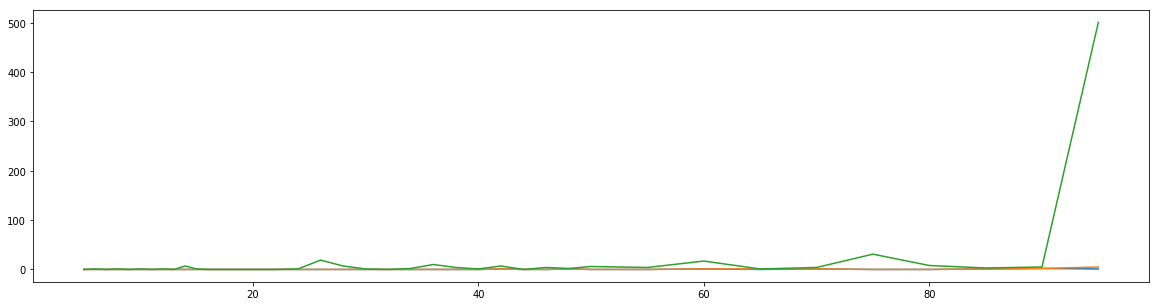

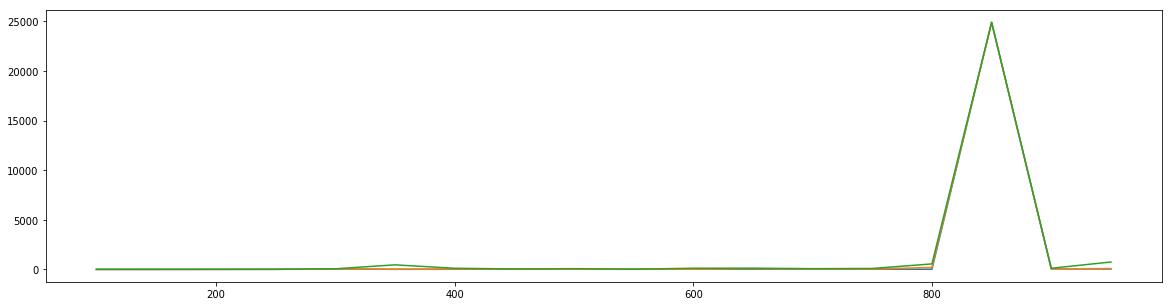

In [53]:
import matplotlib.pyplot as plt
X=[]
for i in range(5,20):
    X.append(i)
for i in range(20,50,2):
    X.append(i)
for i in range(50,100,5):
    X.append(i)
for i in range(100,1000,50):
    X.append(i)
plt.figure(figsize=(20, 5))
plt.plot(X[0:40],Error[0:40])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(X[40:],Error[40:])
plt.show()

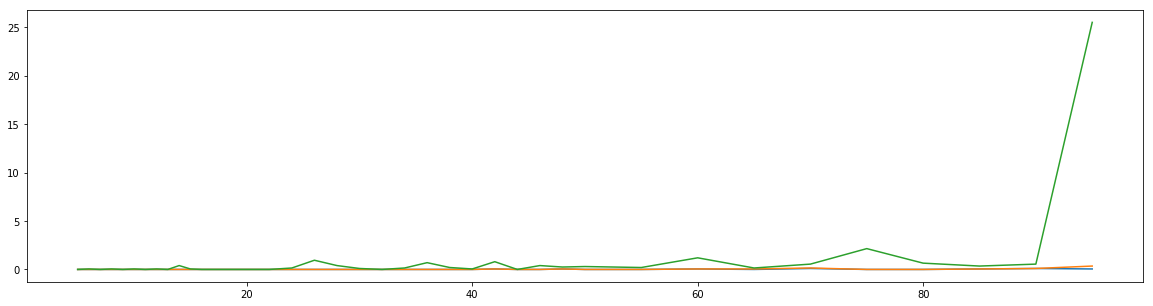

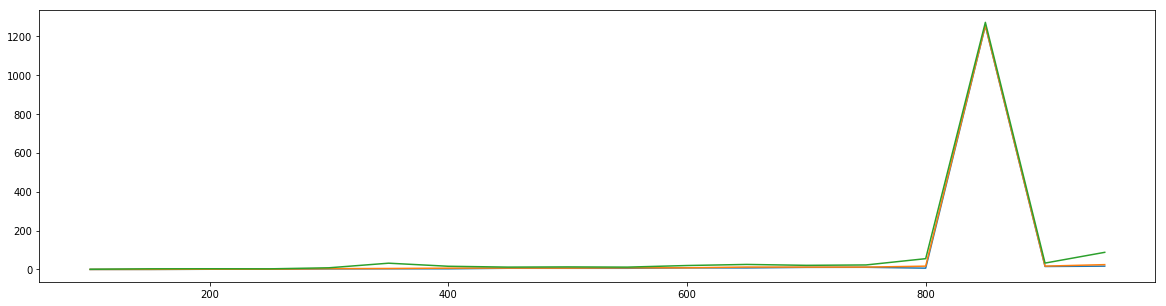

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(X[0:40],Error_m[0:40])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(X[40:],Error_m[40:])
plt.show()